<a href="https://colab.research.google.com/github/shivi0701/MLProject4/blob/shivi/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fake_or_real_news.csv', on_bad_lines='skip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,name,title,text,label,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(df)

7795

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.head(3)

,name,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL


In [ ]:
df.describe()

,name,title,text,label
count,7576,7185,6929,6755
unique,7519,7085,6644,437
top,#NAME?,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,28,5,58,3161


In [ ]:
df['label'].value_counts()

REAL                                                                            3161
FAKE                                                                            3154
 or naturalization or by jus sanguinis – inherited through ancestors/parents       3
 for example                                                                       2
 Philippines                                                                       2
                                                                                ... 
 Plan D marked                                                                     1
 the Jewish settlers had built their houses higher up the mountain. Thus           1
 Tel Aviv–Jaffa                                                                    1
 the Haganah attacked the village of Khisas at night                               1
 George W. Bush                                                                    1
Name: label, Length: 437, dtype: int64

In [ ]:
df.isnull().sum()

name      219
title     610
text      866
label    1040
dtype: int64

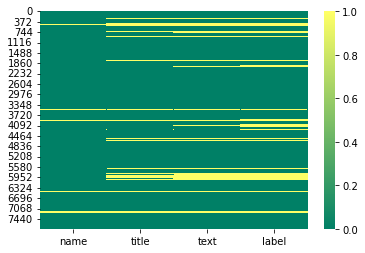

In [ ]:
sns.heatmap(df.isnull(), cbar=True, cmap="summer")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7795 entries, 0 to 7794
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    7576 non-null   object
 1   title   7185 non-null   object
 2   text    6929 non-null   object
 3   label   6755 non-null   object
dtypes: object(4)
memory usage: 243.7+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,name,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
7790,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
7791,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
7792,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
7793,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
df.isnull().sum()

name     0
title    0
text     0
label    0
dtype: int64

In [ ]:
df.describe()

,name,title,text,label
count,6754,6754,6754,6754
unique,6725,6667,6472,436
top,#NAME?,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,20,5,58,3161


# **Balance this data** 

In [ ]:
real=df[df['label'] =='REAL']
real.head()

,name,title,text,label
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [ ]:
fake= df[df['label'] =='FAKE']
fake.head()

,name,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE


In [ ]:
real.shape, fake.shape

((3161, 4), (3154, 4))

In [ ]:
real=real.sample(fake.shape[0])

In [ ]:
real.shape

(3154, 4)

In [ ]:
real.shape, fake.shape

((3154, 4), (3154, 4))

In [ ]:
data= real.append(fake,ignore_index=True)
data

,name,title,text,label
0,2932,Battle against Islamic State expands as Egypt ...,Egypt's airstrikes came in response to the mas...,REAL
1,3002,Hope and hype of Hiroshima can’t conceal Obama...,"Seven years ago, in the Czech capital of Pragu...",REAL
2,882,Four ways to fix American politics,The roots of gridlock will never be addressed ...,REAL
3,2135,Climate-change deniers are in retreat,There is no denying it: Climate-change deniers...,REAL
4,307,Boehner takes revenge,Top Dems want White House to call off Part B d...,REAL
...,...,...,...,...
6303,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6304,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6305,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6306,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(data['title'],data['label'], test_size=0.3, shuffle=True,stratify= data['label'])

In [ ]:
x_train.shape

(4415,)

In [ ]:
y_train

2340    REAL
6185    FAKE
4662    FAKE
5351    FAKE
2832    REAL
        ... 
4909    FAKE
3207    FAKE
6228    FAKE
3137    REAL
3139    REAL
Name: label, Length: 4415, dtype: object

# **Bag of words Creation**

In [ ]:
vectorizer=TfidfVectorizer()

In [ ]:
X_train=vectorizer.fit_transform(x_train)

In [ ]:
X_train.shape

(4415, 8380)

In [ ]:
4415*8360

36909400

In [ ]:
X_train

<4415x8380 sparse matrix of type '<class 'numpy.float64'>'
	with 44564 stored elements in Compressed Sparse Row format>

# Pipeline and RF

In [ ]:
clf= Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=10,n_jobs=-1))])

In [ ]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_estimators=10, n_jobs=-1))])

In [ ]:
y_pred= clf.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[717, 230],
       [255, 691]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7437929212889594

In [ ]:
clf.predict(["Accepting the"])

array(['FAKE'], dtype=object)

In [ ]:
clf.predict(["Hillary's cash flow"])

array(['FAKE'], dtype=object)

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=1, gamma='auto'))])

In [ ]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC(C=1, gamma='auto'))])

In [ ]:
y_pred= clf.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[  0, 947],
       [  0, 946]])

In [ ]:
accuracy_score(y_test,y_pred)

0.49973586899101957

In [ ]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

        FAKE       0.00      0.00      0.00       947
        REAL       0.50      1.00      0.67       946

    accuracy                           0.50      1893
   macro avg       0.25      0.50      0.33      1893
weighted avg       0.25      0.50      0.33      1893



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(data[0:5])

   name                                              title  \
0  2932  Battle against Islamic State expands as Egypt ...   
1  3002  Hope and hype of Hiroshima can’t conceal Obama...   
2   882                 Four ways to fix American politics   
3  2135              Climate-change deniers are in retreat   
4   307                              Boehner takes revenge   

                                                text label  
0  Egypt's airstrikes came in response to the mas...  REAL  
1  Seven years ago, in the Czech capital of Pragu...  REAL  
2  The roots of gridlock will never be addressed ...  REAL  
3  There is no denying it: Climate-change deniers...  REAL  
4  Top Dems want White House to call off Part B d...  REAL  


In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

array([0.81879955, 0.82332956, 0.81879955, 0.81313703, 0.82446206])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.82 accuracy with a standard deviation of 0.00
